#### Support Vector Classifier implementation

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
### Lets create Synthetic data Points

from sklearn.datasets import make_classification


In [80]:
X,y = make_classification(n_samples=1000,n_classes=2,n_features=2,n_clusters_per_class=2,n_redundant=0)

In [81]:
pd.DataFrame(X)[1]

0      1.989702
1     -1.670552
2      1.322934
3      0.203811
4     -0.959161
         ...   
995    0.015715
996   -0.842233
997   -1.082660
998    0.759536
999   -1.020576
Name: 1, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

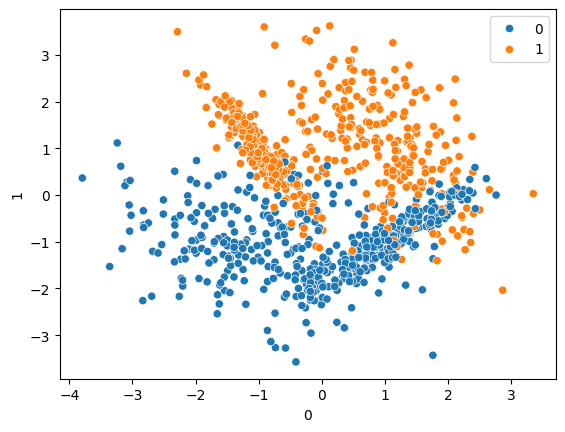

In [82]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [84]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')

In [85]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [86]:
### Prediction
y_pred = svc.predict(X_test)

In [87]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[113  16]
 [ 18 103]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       129
           1       0.87      0.85      0.86       121

    accuracy                           0.86       250
   macro avg       0.86      0.86      0.86       250
weighted avg       0.86      0.86      0.86       250



In [88]:
rbf = SVC(kernel='rbf')

In [89]:
rbf.fit(X_train,y_train)

SVC()

In [90]:
y_pred_2 = rbf.predict(X_test)

In [91]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred_2))
print(classification_report(y_test,y_pred_2))

[[121   8]
 [ 20 101]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       129
           1       0.93      0.83      0.88       121

    accuracy                           0.89       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.89      0.89      0.89       250



In [92]:
poly = SVC(kernel='poly')
poly.fit(X_train,y_train)


SVC(kernel='poly')

In [96]:
y_pred3 = poly.predict(X_test)

In [97]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[109  20]
 [ 15 106]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       129
           1       0.84      0.88      0.86       121

    accuracy                           0.86       250
   macro avg       0.86      0.86      0.86       250
weighted avg       0.86      0.86      0.86       250



In [95]:
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train,y_train)
y_pred4 = sigmoid.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred4))
print(classification_report(y_test,y_pred4))


[[114  15]
 [ 21 100]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       129
           1       0.87      0.83      0.85       121

    accuracy                           0.86       250
   macro avg       0.86      0.86      0.86       250
weighted avg       0.86      0.86      0.86       250



#### HyperparameterTuning with SVC

In [98]:
from sklearn.model_selection import GridSearchCV

## Define parameter Range
param_Grid = {'C':[0.1,1,10,100,1000],
              'gamma': [1,0.1,0.01,0.0001,0.001],
              'kernel': ['rbf']}

In [101]:
grid = GridSearchCV(svc,param_grid=param_Grid,cv=5,verbose=3,refit=True)

In [103]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.893 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.0001, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

In [104]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [105]:
y_pred5 = grid.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

[[120   9]
 [ 13 108]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       129
           1       0.92      0.89      0.91       121

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

